In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [15]:
def extrair_features(caminho_audio):
    y, sr = librosa.load(caminho_audio, sr=None)
    
    # MFCC, Zero Crossing Rate, Spectral Centroid
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    zcr = librosa.feature.zero_crossing_rate(y)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    
    # Concatenar a média das features
    features = np.concatenate((
        np.mean(mfccs, axis=1),
        np.mean(zcr, axis=1),
        np.mean(centroid, axis=1)
    ))
    
    return features


In [16]:
X = []
y = []

pasta_normal = "audios/normal"
pasta_problema = "audios/sem_p1p4"

for arquivo in os.listdir(pasta_normal):
    caminho = os.path.join(pasta_normal, arquivo)
    X.append(extrair_features(caminho))
    y.append(1)

for arquivo in os.listdir(pasta_problema):
    caminho = os.path.join(pasta_problema, arquivo)
    X.append(extrair_features(caminho))
    y.append(0)

X = np.array(X)
y = np.array(y)

print("Total de amostras:", len(X))


Total de amostras: 537


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9907407407407407

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.98      0.99        44

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



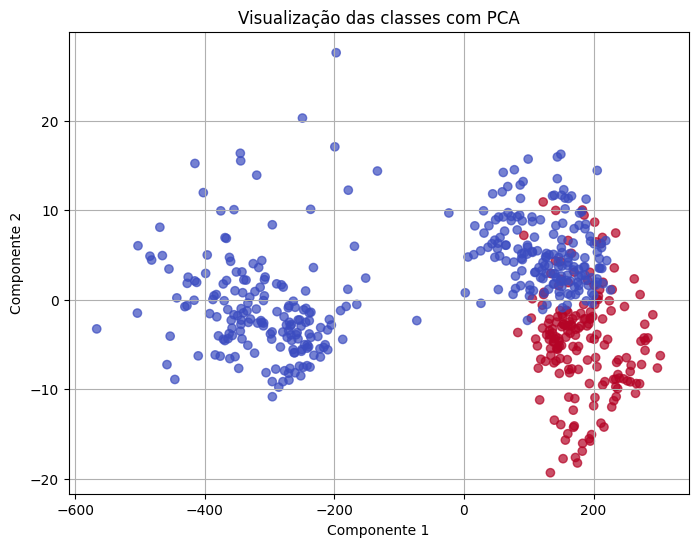

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("Visualização das classes com PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()
